# 第5回の宿題の回答例

## 前準備

In [1]:
from sqlalchemy import create_engine

DB_PATH = "/Users/localadmin/Desktop/suzuki_skilltransfer.sqlite3"
engine = create_engine(f"sqlite:///{DB_PATH}")

In [2]:
import pandas as pd

df_warranty = pd.read_sql("""
    select substr(W_PROD_MODEL_CD, 1, 3) as prod_cd
        ,substr(W_CAUSAL_PART_NO, 1, 9) as part_cd
        ,substr(W_FAILURE_DATE, 1, 6)as month
        ,count(*) as n
    from dbhaa
    where W_PROD_BASE_CD = '100100'
    and W_PROD_DIV = 'B'
    group by prod_cd, part_cd, month
""", engine)

In [3]:
n_part = df_warranty.groupby("part_cd")["n"].sum()
top10_parts = (n_part
               .sort_values(ascending = False)[:10]
               .index)
df_warranty["MONTH"] = pd.to_datetime(
    df_warranty.month.astype(str) + "01"
)

In [4]:
%matplotlib inline

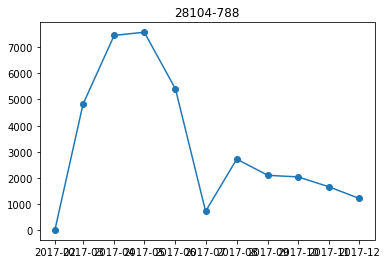

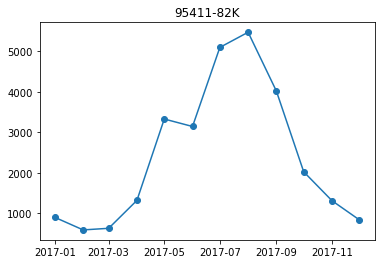

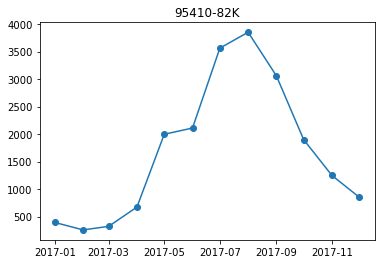

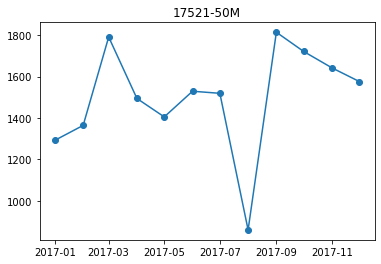

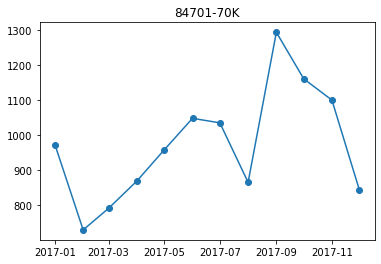

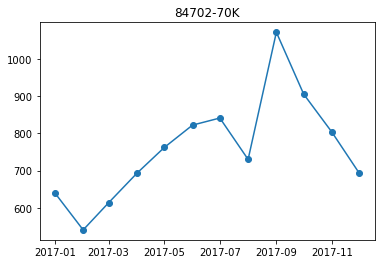

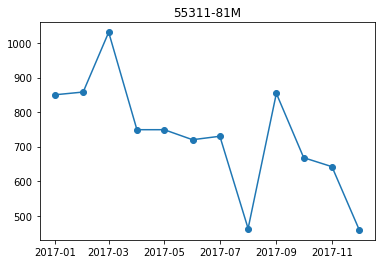

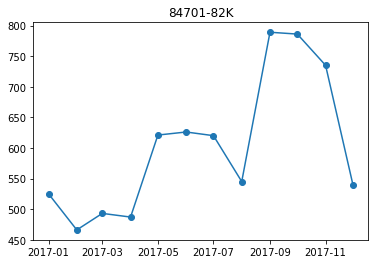

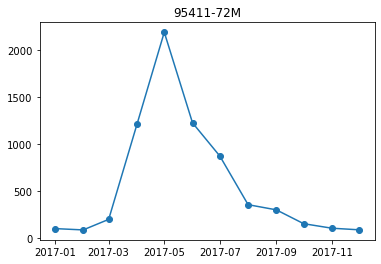

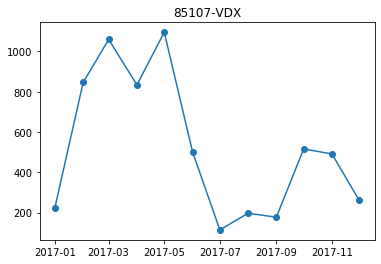

In [5]:
import matplotlib.pyplot as plt

for part in top10_parts:
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    plt.plot(tmp.index, tmp.values, "o-")
    plt.title(part)
    plt.show()
    
# 上位10パーツ毎のプロット

## 回答例

- fig, add_subplotを使用して一つのグラフでまとめて描画してみてください。

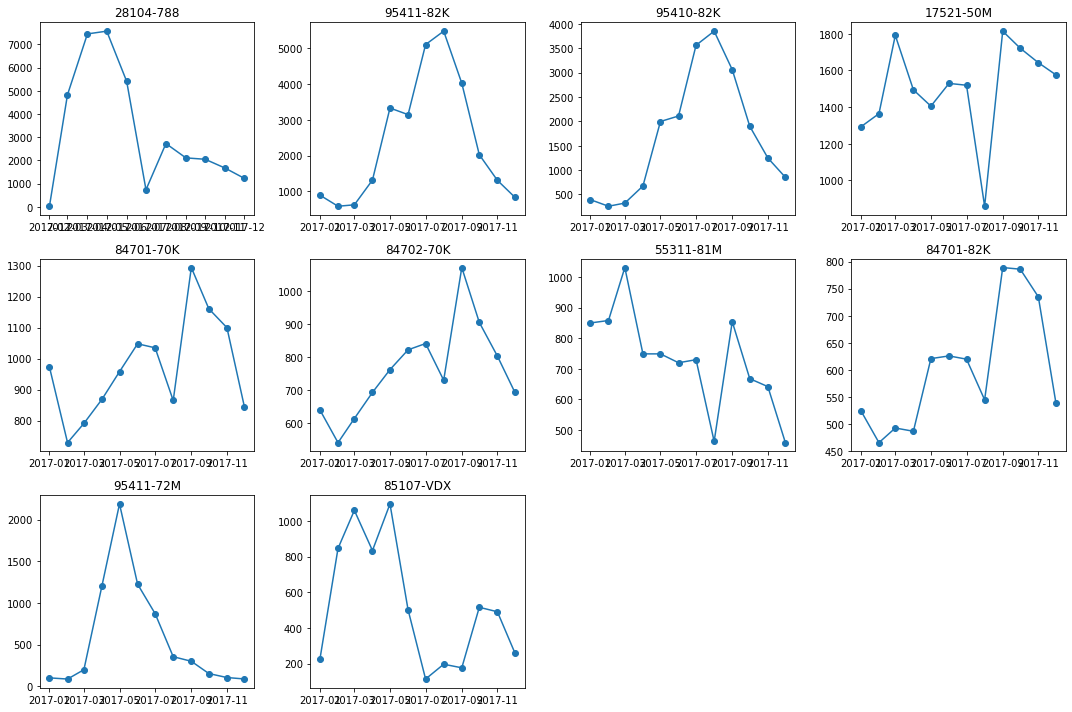

In [6]:
fig = plt.figure(figsize=(15,10)) # グラフオブジェクト(サイズ 横15, 縦10)

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) # 3行、4列、今の位置(1始まり)
    
    ax.plot(tmp.index, tmp.values, "o-")
    ax.set_title(part) # タイトルを追加

plt.tight_layout()
# plt.show()

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


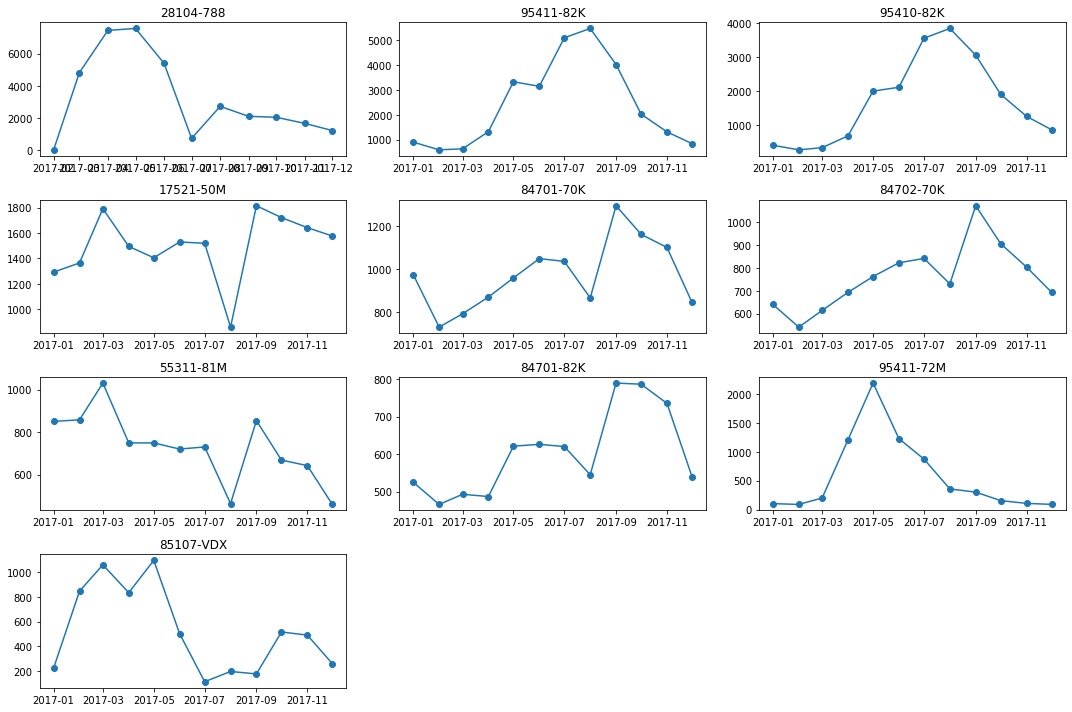

In [7]:
# こちらの方がわかりやすいかもしれない。
# subplotsは引数に大きさ、行分割数、列分割数をとる。
# 返り値はグラフオブジェクトfigと、分割された中のプロット用の2次元配列オブジェクトaxes
fig, axes = plt.subplots(figsize=(15,10), nrows=4, ncols=3)

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = axes[i // 3, i % 3] # 配列でアクセスする    
    ax.plot(tmp.index, tmp.values, "o-")
    ax.set_title(part) # タイトルを追加

# 要らない分割部分を消さないといけないのが玉にキズ(気にならないのであれば、消さなくても良い)
for i in range(len(top10_parts), 4*3):
    fig.delaxes(axes.flatten()[i])
    
fig.tight_layout()
fig.show()

- パーツ毎ではなく、機種毎でプロットしてみてください

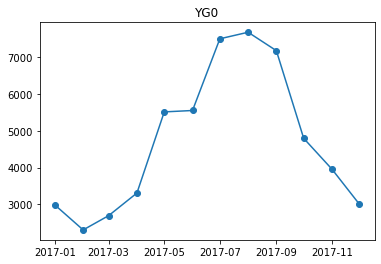

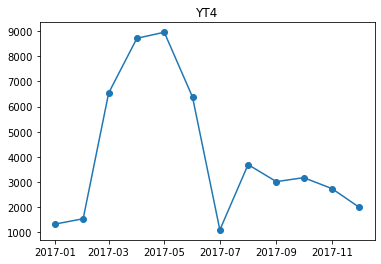

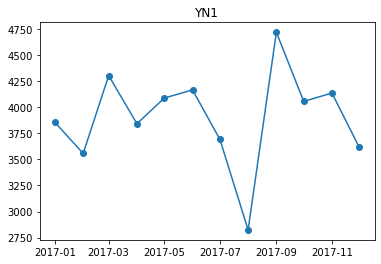

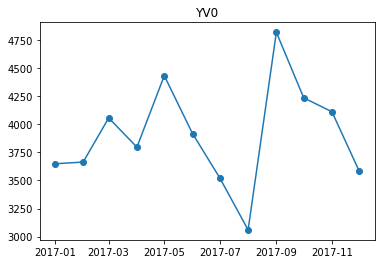

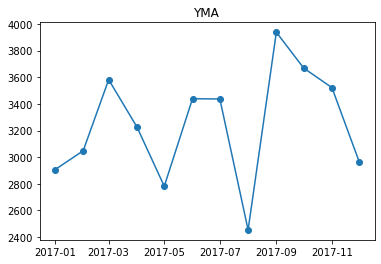

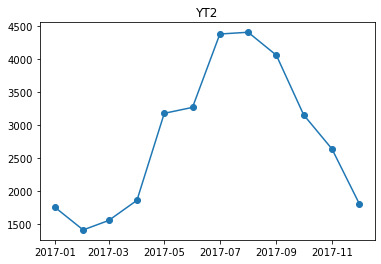

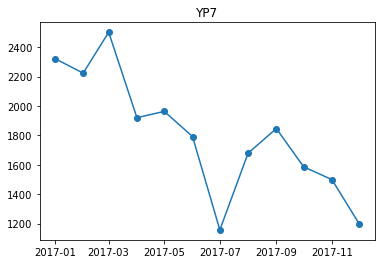

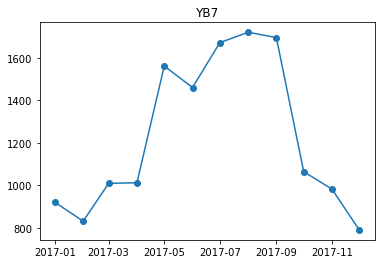

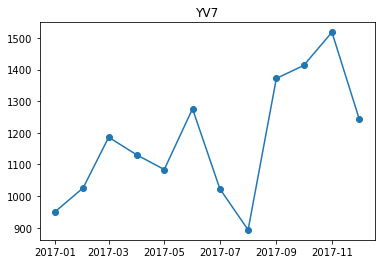

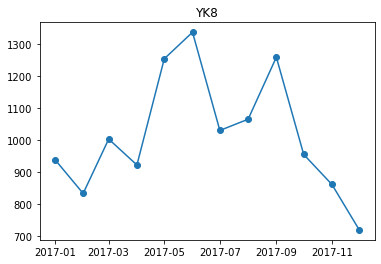

In [8]:
top10_model = (df_warranty.groupby("prod_cd")["n"].sum()
               .sort_values(ascending = False)[:10]
               .index)

for i, model in enumerate(top10_model):
    tmp = (df_warranty.loc[df_warranty.prod_cd == model,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    
    plt.plot(tmp.index, tmp.values, "o-")
    plt.title(model)
    plt.show()

- 機種毎のプロットについても、問題2と同様、fig, add_subplotを使用して一つのグラフでまとめて描画してみてください。

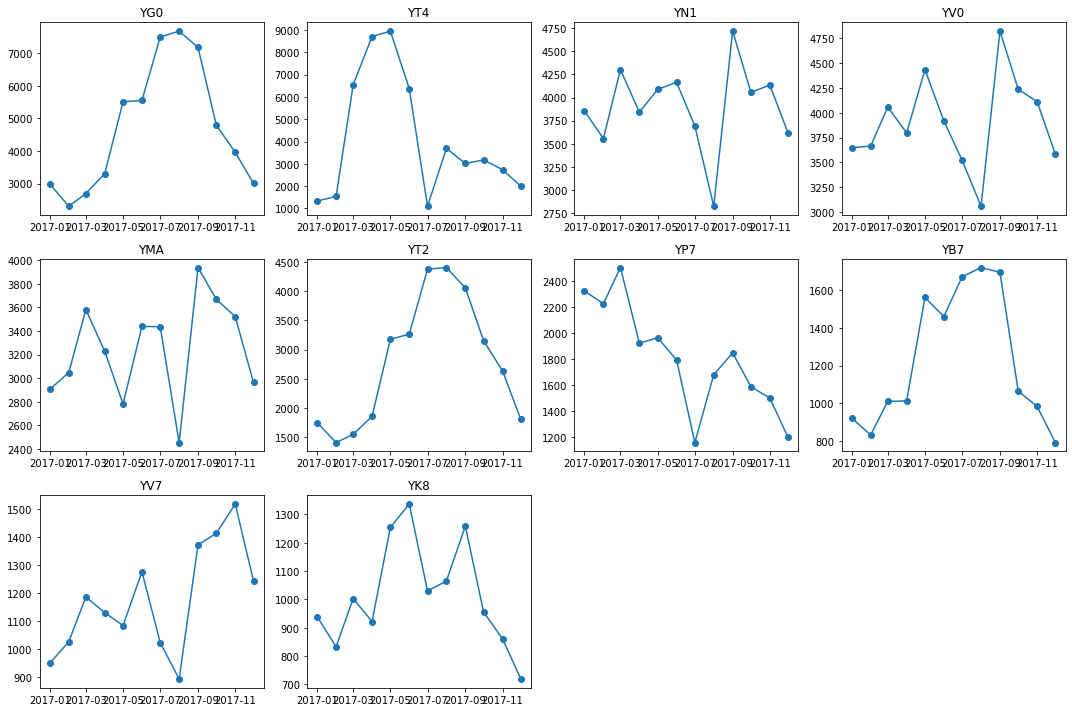

In [9]:
fig = plt.figure(figsize=(15,10)) # グラフオブジェクト(サイズ 横15, 縦10)

for i, model in enumerate(top10_model):
    tmp = (df_warranty.loc[df_warranty.prod_cd == model,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) # 3行、4列、今の位置(1始まり)
    
    ax.plot(tmp.index, tmp.values, "o-")
    ax.set_title(model) # タイトルを追加

plt.tight_layout()
plt.show()

## 追加の宿題

- 問題2のグラフについて、set_ylimを使って、y軸の範囲を0から10,000にして表示してください。

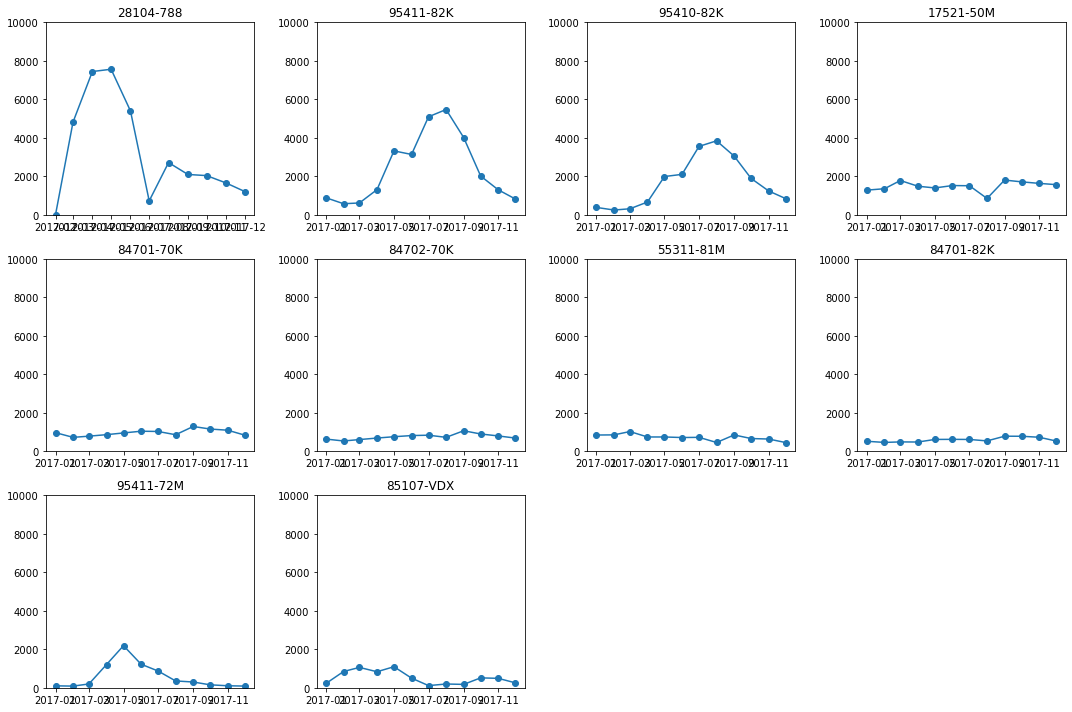

In [10]:
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "o-")
    ax.set_title(part) 
    ax.set_ylim(0,10_000)

plt.tight_layout()
plt.show()

- 問題2のグラフについて、set_xlimを使って、2017年の上半期だけ表示してください。

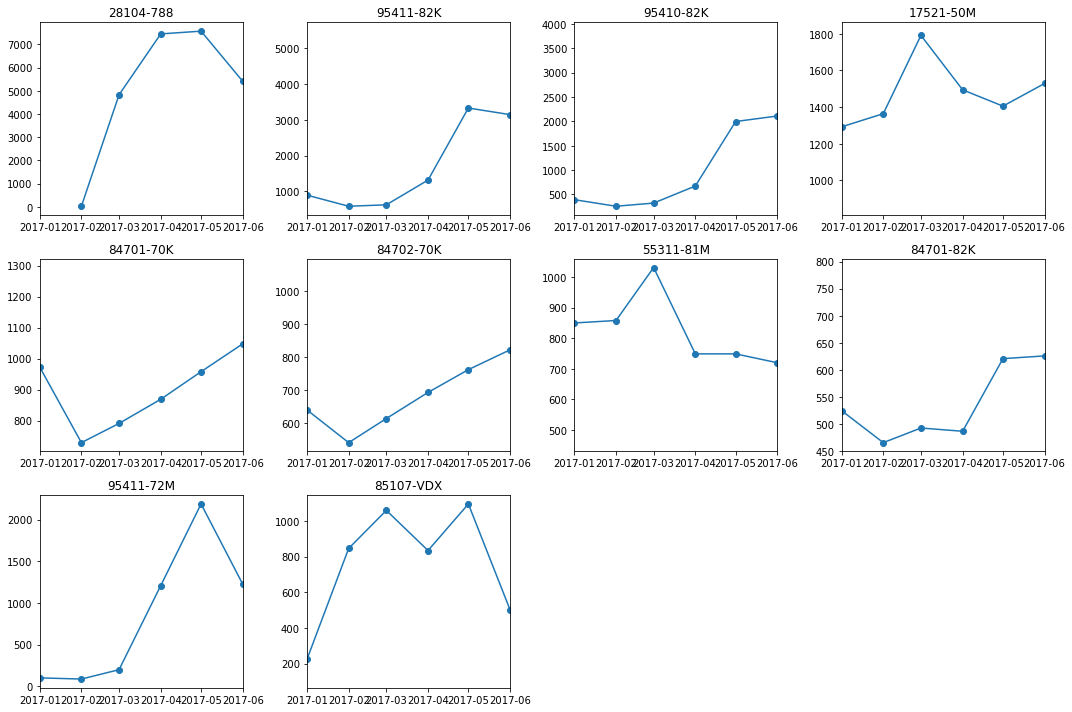

In [11]:
from datetime import datetime

fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "o-")
    ax.set_title(part) 
    ax.set_xlim(datetime(2017,1,1), datetime(2017,6,1))

plt.tight_layout()
plt.show()

- 問題2のグラフについて、マーカーを△に、線を点線に変更してください。

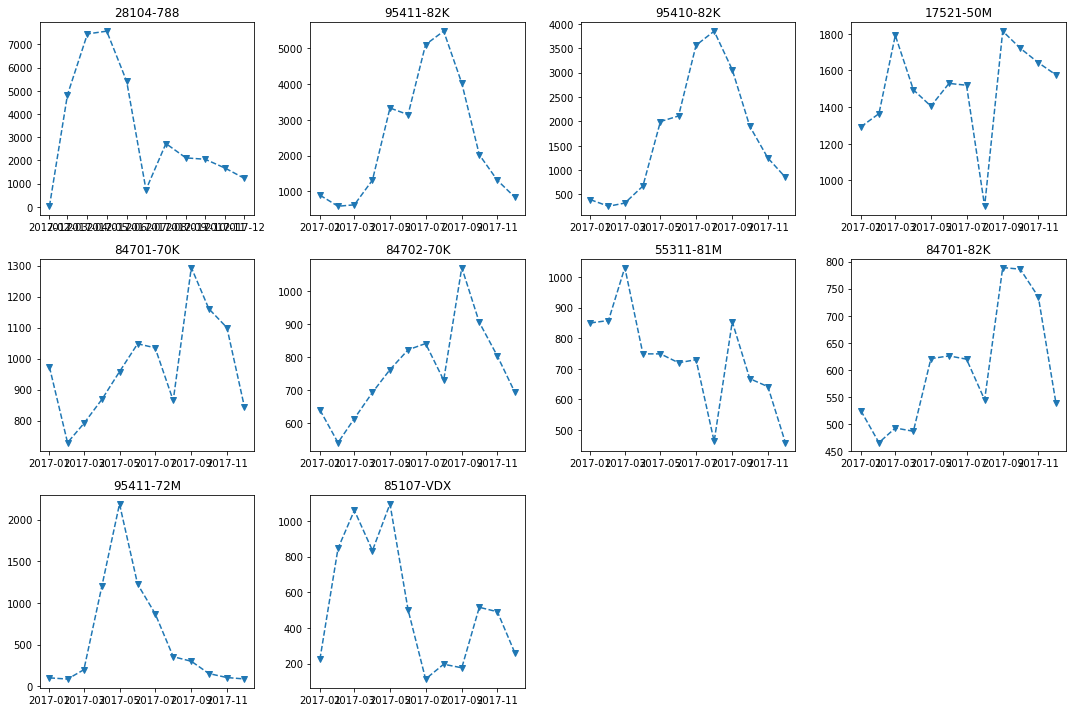

In [12]:
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "v--") # v-- でも可
    ax.set_title(part) 

plt.tight_layout()
plt.show()

- 問題2のグラフについて、マーカーを消して、線だけに変更してください。

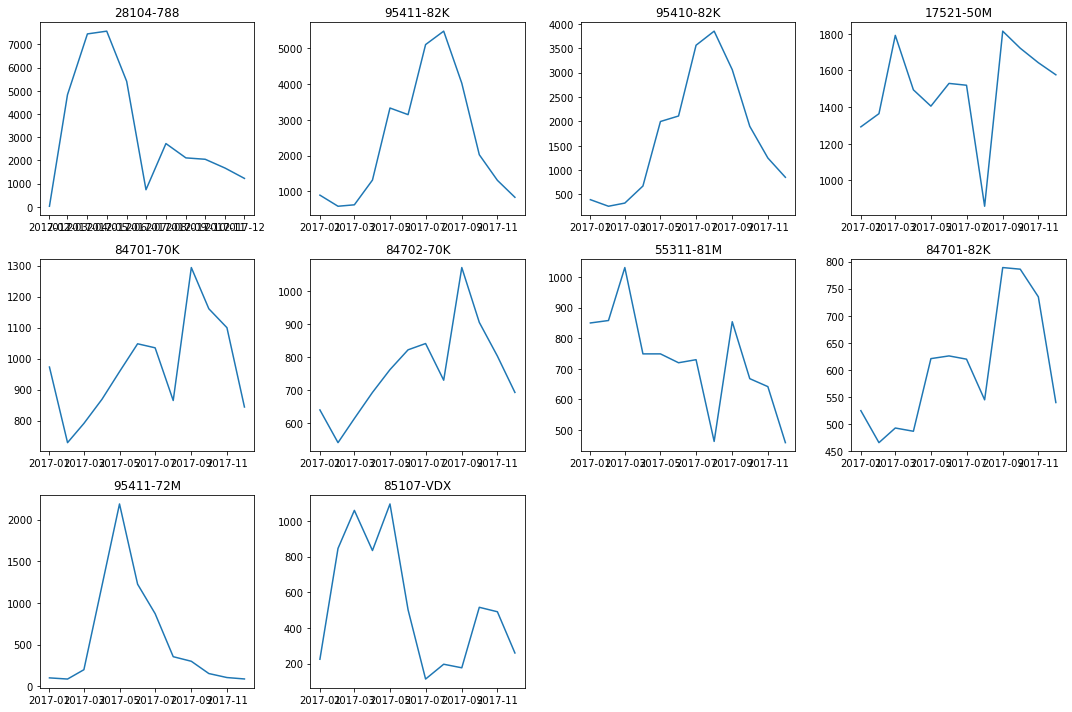

In [13]:
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "-")
    ax.set_title(part) 

plt.tight_layout()
plt.show()

- 問題2のグラフについて、線を消して、四角のマーカーだけに変更してください。

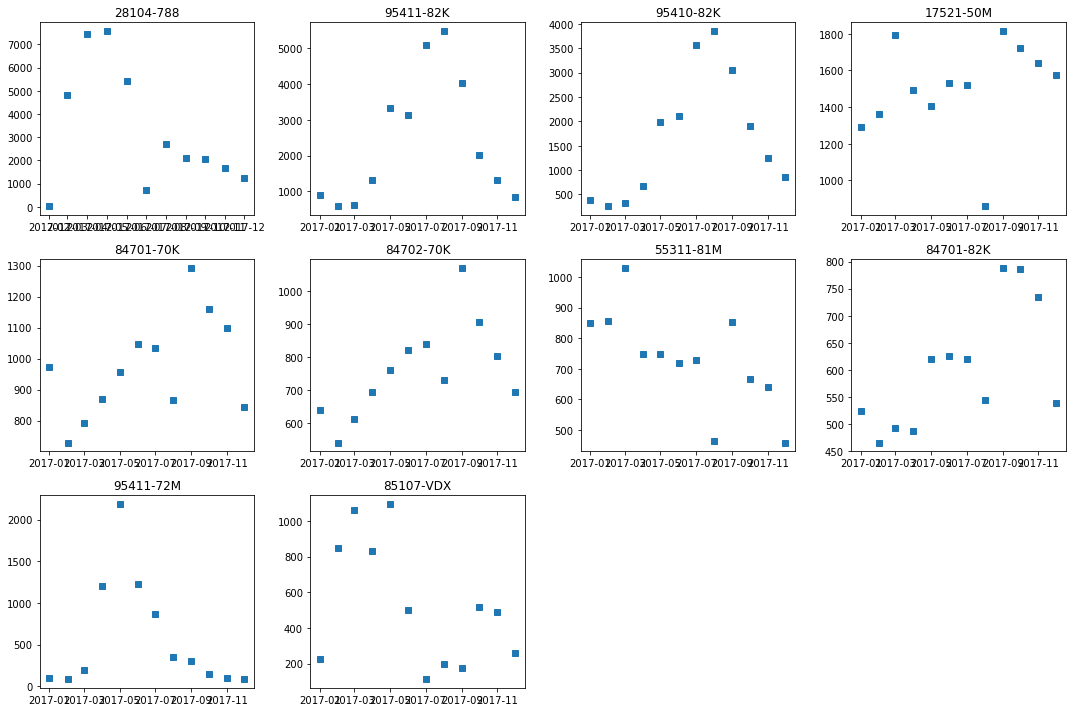

In [14]:
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "s")
    ax.set_title(part) 

plt.tight_layout()
plt.show()

- 問題2のグラフについて、色を赤色に変更してください。

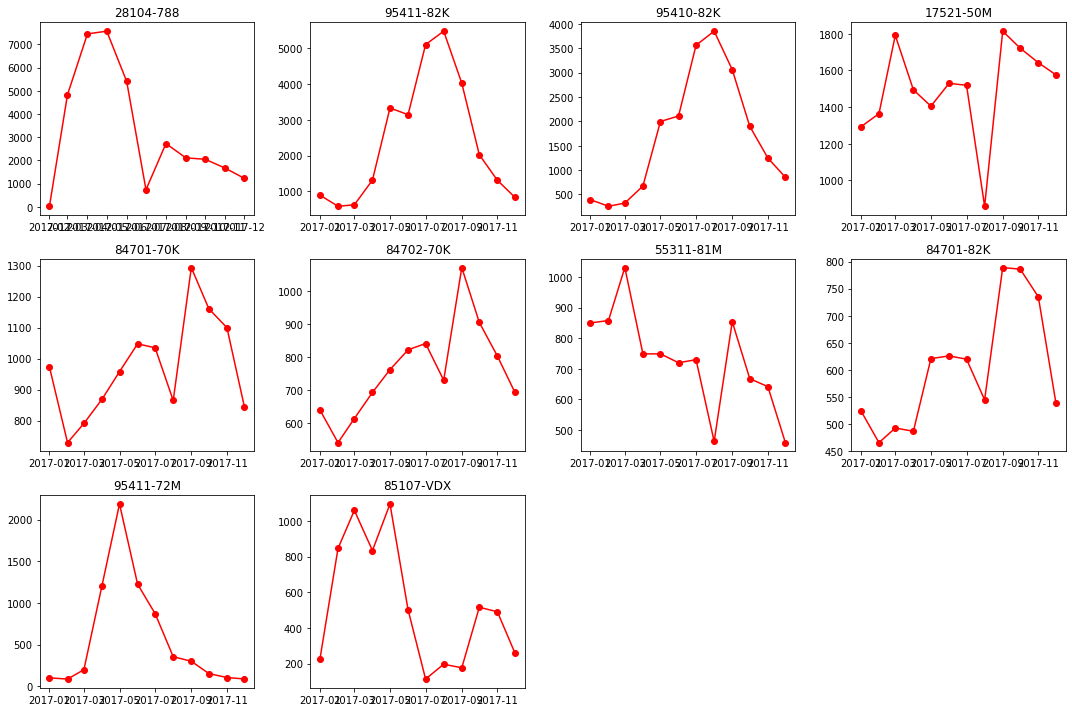

In [15]:
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "o-", color="red")
    ax.set_title(part) 

plt.tight_layout()
plt.show()

- 問題2のグラフについて、各グラフにパーツ名の凡例を表示してください。

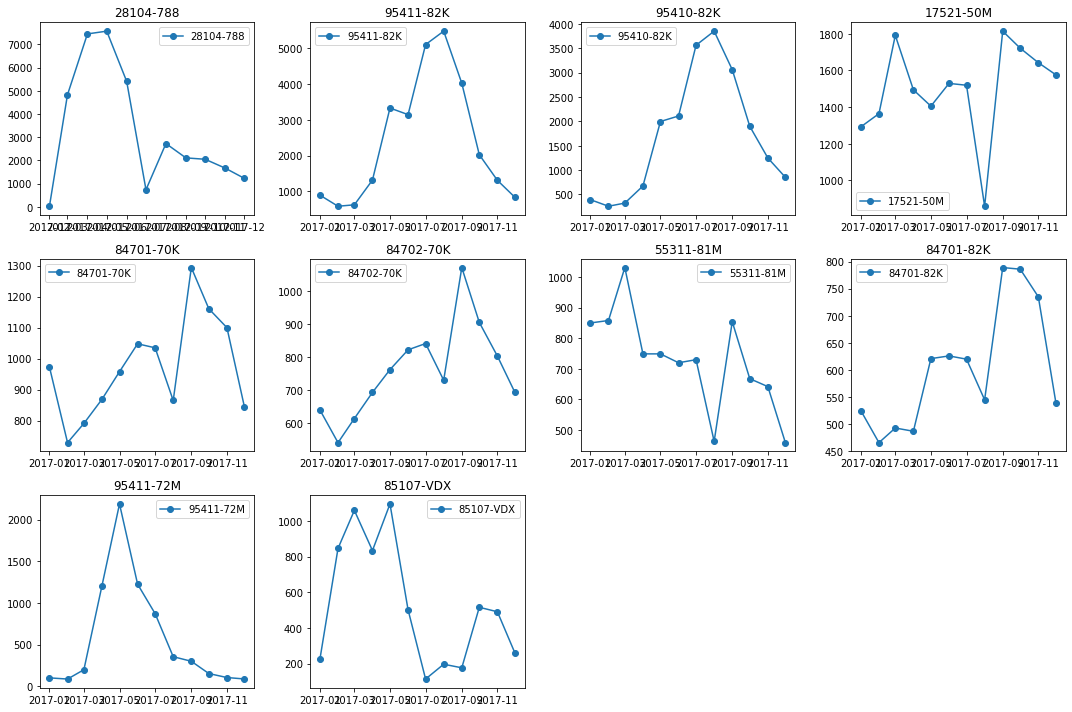

In [16]:
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "o-", label=part)
    ax.set_title(part) 
    ax.legend()

plt.tight_layout()
plt.show()

- 問題2のグラフを"parts_warranty_monthly.png"という名前を付けてnotebookのある場所にfigureというフォルダを作ったうえで、保存してください。

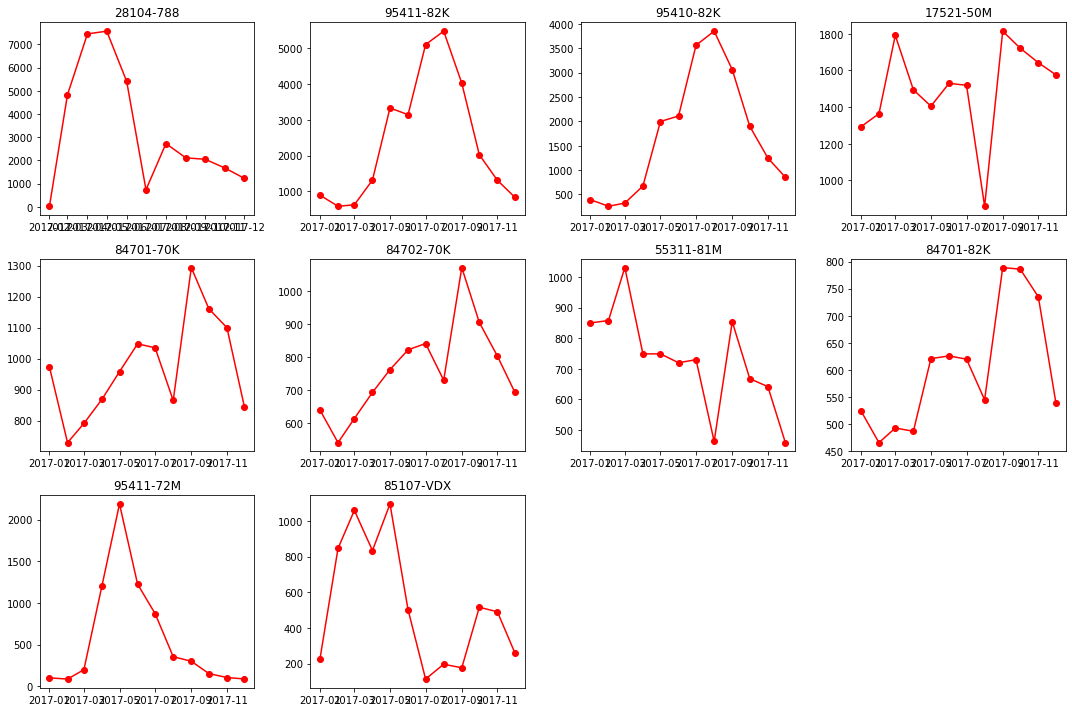

In [17]:
from pathlib import Path

# カレントディレクトリのfigure(この時点ではフォルダかファイルかわからない)
path_figures = Path.cwd()/"figures"

# フォルダを作成
# exist_ok: True:もし既存のフォルダがあっても、何もしない(OK)。
#          False:もし既存のフォルダがあったら、例外(エラーのこと)を送出する。
# ちなみに、.touch()だと、フォルダではなくファイルを作る。

path_figures.mkdir(exist_ok=True) 
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = (df_warranty.loc[df_warranty.part_cd == part,
                   ["MONTH", "n"]]
           .groupby(["MONTH"])["n"]
           .apply(sum))
    ax = fig.add_subplot(3, 4, i+1) 
    
    ax.plot(tmp.index, tmp.values, "o-", color="red")
    ax.set_title(part) 

plt.tight_layout()
plt.savefig(path_figures/"parts_warranty_monthly.png")
plt.show()

In [18]:
!ls figure # 確かに作成されている

parts_top10_in_out.png     parts_warranty_monthly.png


In [19]:
!tree figure 
# treeの方が見やすいかもしれない。
# treeコマンドはHomebrewを入れたあとで、brew install treeでインストールできる。
# (Homebrewは基本何でもインストールできるので便利)

figure
├── parts_top10_in_out.png
└── parts_warranty_monthly.png

0 directories, 2 files


- 国内生産/四輪に絞った場合において、最も多くの機種に採用されているパーツは何で、何種類の機種に採用されていますか？パーツコードは上5-3桁を使用してください。

In [20]:
df_warranty.head()

,prod_cd,part_cd,month,n,MONTH
0,None,17521-81P,201711,1,2017-11-01
1,None,17540-54L,201712,1,2017-12-01
2,None,17670-50G,201712,1,2017-12-01
3,None,17700-50Z,201701,1,2017-01-01
4,None,17700-50Z,201703,1,2017-03-01


In [21]:
df_warranty_models_having_parts = (df_warranty
                                   .groupby("part_cd")["prod_cd"]
                                   .nunique()
                                   .sort_values(ascending=False))

In [22]:
df_warranty_models_having_parts.head()

part_cd
09471-122    23
38860-76F    21
36410-63J    20
09283-400    19
09283-350    18
Name: prod_cd, dtype: int64

09471-122が最大。<font color=red>**23**</font>機種に採用。

- 国内生産/四輪に絞った場合において、ワランティ件数上位10種のパーツのそれぞれにおいて、輸出と輸入の件数を棒グラフにして比較してください。

In [23]:
df_warranty_inout = pd.read_sql(
"""
    select
        substr(W_CAUSAL_PART_NO, 1, 9) as part_cd
        ,W_DMEX_DIV
        ,count(*) as n
    from 
        dbhaa
    where
        W_BASE_CD = '100100'
        and W_PROD_DIV = 'B'
    group by
        part_cd, W_DMEX_DIV;
""", engine)

In [24]:
df_warranty_inout

,part_cd,W_DMEX_DIV,n
0,01421-102,0,1
1,01500-082,1,1
2,01547-064,0,1
3,01550-061,1,11
4,01550-062,0,1
5,01550-062,1,1
6,01550-065,0,1
7,01550-082,0,2
8,01550-083,0,1
9,01550-083,1,2


In [25]:
df_warranty_inout.shape

(15369, 3)

In [26]:
df_warranty_inout.head()

,part_cd,W_DMEX_DIV,n
0,01421-102,0,1
1,01500-082,1,1
2,01547-064,0,1
3,01550-061,1,11
4,01550-062,0,1


In [27]:
df_warranty_inout_pivot = (df_warranty_inout
                          .pivot_table(index="part_cd",columns="W_DMEX_DIV",values="n")
                          .fillna(0).rename(columns={"1":"輸出","0":"国内"}))
df_warranty_inout_pivot.head()

W_DMEX_DIV,国内,輸出
part_cd,,
01421-102,1.0,0.0
01500-082,0.0,1.0
01547-064,1.0,0.0
01550-061,0.0,11.0
01550-062,1.0,1.0


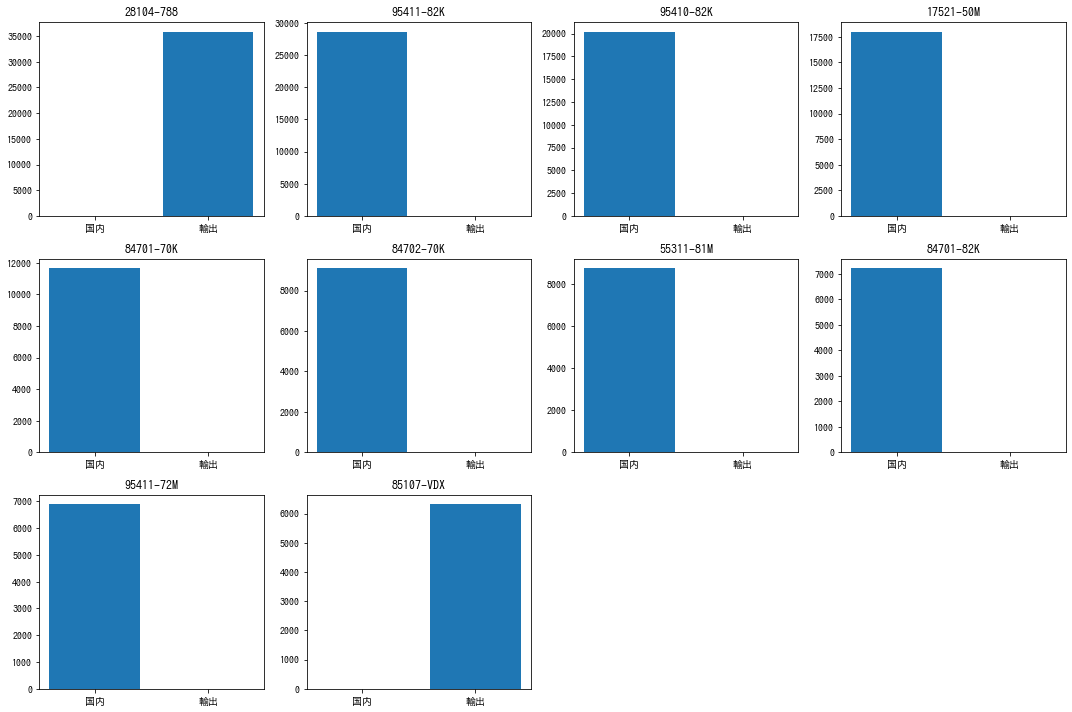

In [28]:
plt.rcParams["font.family"] = "IPAGothic"
fig = plt.figure(figsize=(15,10)) 

for i, part in enumerate(top10_parts):
    tmp = df_warranty_inout_pivot.loc[part]
    ax = plt.subplot(3, 4, i+1) 
    
    ax.bar(tmp.index, tmp.values)
    ax.set_title(part) 

plt.tight_layout()
plt.savefig(path_figures/"parts_top10_in_out.png")
plt.show()